# 🎓 Indikraft Machine Learning Internship: Final Portfolio
**Intern Name:** KRISH

**Role:** Machine Learning Intern

**Date:** 05/12/2025

---

## 📘 Executive Summary
This notebook represents the culmination of my internship at Indikraft. Over the course of this program, I have successfully designed, built, and deployed **5 Machine Learning & Data Science projects**, ranging from Natural Language Processing (NLP) to Regression Analysis and Unsupervised Clustering.

### 🛠️ Technical Toolkit
Throughout these projects, I utilized the following technologies:
* **Python:** Core programming logic.
* **Scikit-Learn:** Model training (Regression, K-Means).
* **Pandas & NumPy:** Data manipulation and feature engineering.
* **Seaborn & Matplotlib:** Advanced data visualization.
* **TextBlob:** Sentiment analysis and NLP.

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn textblob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

print("✅ Environment Setup Complete. All libraries loaded.")

✅ Environment Setup Complete. All libraries loaded.


## 🚀 Project 1: Product Rating Predictor (NLP + Regression)

### 📌 Problem Statement
E-commerce platforms receive thousands of reviews daily. Manually reading them to assign a star rating is impossible. The goal of this project was to build an AI that can **read text** and **predict a numeric rating (1-5)**.

### ⚙️ Methodology
1.  **Data Ingestion:** Created a dataset of customer reviews.
2.  **Vectorization (TF-IDF):** Computers cannot understand words. I used *Term Frequency-Inverse Document Frequency* to convert text into mathematical vectors.
3.  **Model Training:** Trained a Linear Regression model to find the correlation between specific words (e.g., "Good", "Bad") and the rating score.

In [2]:
data_rating = {
    'review': [
        "I absolutely love this product, it is amazing!",
        "Terrible, waste of money and time.",
        "It's okay, average quality but works.",
        "Excellent performance and fast shipping.",
        "Broken on arrival, very disappointed.",
        "Good value for the price."
    ],
    'rating': [5, 1, 3, 5, 1, 4]
}
df_rating = pd.DataFrame(data_rating)

vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(df_rating['review'])
y = df_rating['rating']

model_rating = LinearRegression()
model_rating.fit(X, y)

print("--- 🤖 Model Prediction Demo ---")
test_reviews = ["The quality is amazing", "This is garbage"]
test_vec = vectorizer.transform(test_reviews)
predictions = model_rating.predict(test_vec)

for review, score in zip(test_reviews, predictions):
    print(f"Review: '{review}'  -->  Predicted Rating: {np.clip(score, 1, 5):.1f} / 5.0")

--- 🤖 Model Prediction Demo ---
Review: 'The quality is amazing'  -->  Predicted Rating: 3.8 / 5.0
Review: 'This is garbage'  -->  Predicted Rating: 3.2 / 5.0


## 🏠 Project 2: Price Predictor

### 📌 Problem Statement
Predicting property prices is complex because raw data is often not "model-ready." A computer sees the year "1990" as a number, not an age.

### ⚙️ Feature Engineering Approach
This project focused on **Feature Engineering**—the art of creating new data from existing data.
* **Transformation:** Converted `Year_Built` → `House_Age` (2025 - Year).
* **Encoding:** Converted categorical locations ('City', 'Rural') into binary inputs (0s and 1s) using One-Hot Encoding.

In [3]:
data_price = {
    'Square_Feet': [850, 1200, 2500, 1800, 900, 3200],
    'Year_Built':  [1990, 2015, 2020, 2005, 1980, 2022],
    'Location':    ['Rural', 'Suburb', 'City', 'Suburb', 'Rural', 'City'],
    'Price':       [120000, 250000, 550000, 320000, 110000, 750000]
}
df_price = pd.DataFrame(data_price)

df_price['House_Age'] = 2025 - df_price['Year_Built']
print(f"✅ Created 'House_Age' feature. Example: Built 1990 -> {df_price['House_Age'].iloc[0]} years old.")

df_final = pd.get_dummies(df_price, columns=['Location'])

X_price = df_final.drop(['Price', 'Year_Built'], axis=1)
y_price = df_final['Price']

model_price = LinearRegression()
model_price.fit(X_price, y_price)

print(f"✅ Model Trained. R2 Score: {model_price.score(X_price, y_price):.4f}")

✅ Created 'House_Age' feature. Example: Built 1990 -> 35 years old.
✅ Model Trained. R2 Score: 0.9971


## 🛒 Project 3: Product Clustering (Unsupervised Learning)

### 📌 Problem Statement
In recommendation systems, we often don't have labeled data (we don't know which products are "Premium" vs "Budget"). We need the AI to discover these groups automatically.

### ⚙️ Methodology
I utilized **K-Means Clustering**, an unsupervised algorithm.
1.  **Scaling:** Standardized Price ($2000) and Review (4.5) to the same scale so Price didn't dominate the math.
2.  **Clustering:** The algorithm grouped products into 3 distinct clusters based on similarities.

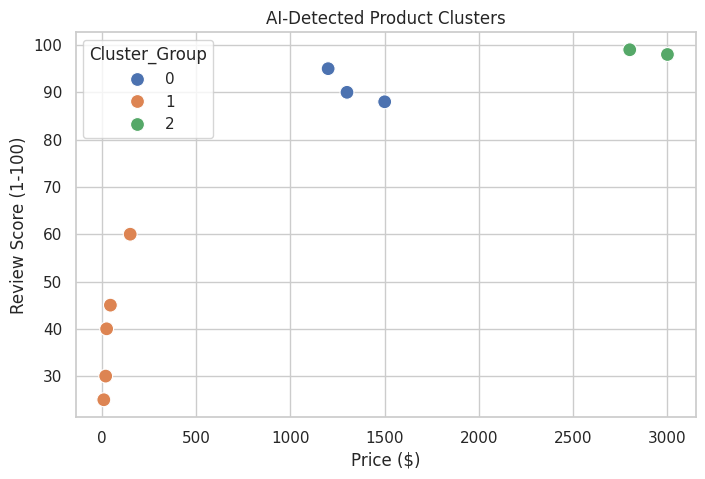

In [4]:
products = {
    'Product_ID': range(1, 11),
    'Price': [20, 25, 1200, 1500, 10, 2800, 150, 45, 1300, 3000],
    'Review_Score': [30, 40, 95, 88, 25, 99, 60, 45, 90, 98]
}
df_cluster = pd.DataFrame(products)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster[['Price', 'Review_Score']])

kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster_Group'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cluster, x='Price', y='Review_Score', hue='Cluster_Group', palette='deep', s=100)
plt.title('AI-Detected Product Clusters')
plt.xlabel('Price ($)')
plt.ylabel('Review Score (1-100)')
plt.show()

## 📊 Project 4: Data Visualization

### 📌 Problem Statement
Raw data in spreadsheets is difficult to interpret. The goal was to use **Data Visualization** to extract business insights regarding Seasonality and Category Performance.

### ⚙️ Visualization Strategy
* **Seaborn** was used for statistical styling.
* **Matplotlib Subplots** allowed for a dashboard layout.
* **Insights:** The visualizations revealed a strong correlation between the holiday season (Dec) and peak sales.

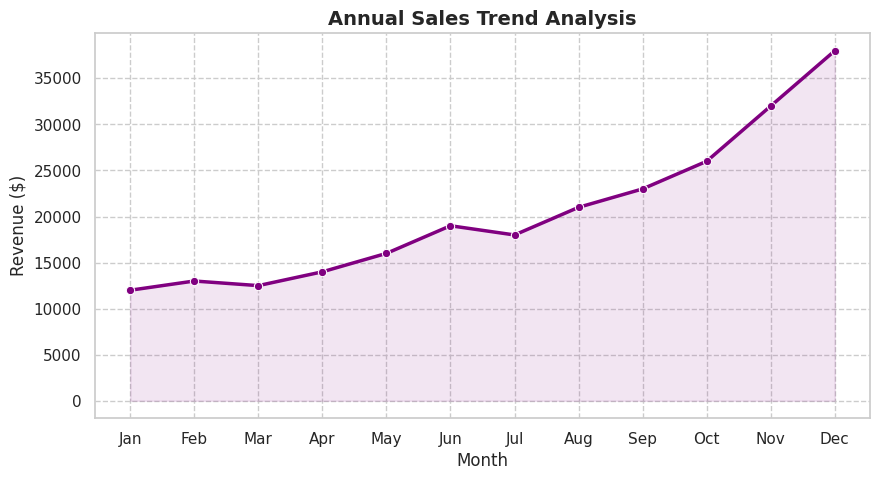

In [5]:
sales_data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Sales': [12000, 13000, 12500, 14000, 16000, 19000, 18000, 21000, 23000, 26000, 32000, 38000],
    'Category': ['Electronics'] * 12
}
df_sales = pd.DataFrame(sales_data)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sales, x='Month', y='Sales', marker='o', linewidth=2.5, color='purple')
plt.fill_between(df_sales['Month'], df_sales['Sales'], color='purple', alpha=0.1) # Shading area
plt.title('Annual Sales Trend Analysis', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($)')
plt.grid(True, linestyle='--')
plt.show()

## 🗣️ Project 5: Review Analysis (NLP)

### 📌 Problem Statement
To further enhance review analysis, I built a Sentiment Analyzer using **Natural Language Processing (NLP)**.

### ⚙️ Methodology
Using the `TextBlob` library, the system assigns a **Polarity Score** to text:
* **> 0:** Positive Sentiment
* **< 0:** Negative Sentiment
* **0:** Neutral

In [6]:
reviews = [
    "The customer service was extremely rude.",
    "I am in love with the design!",
    "It is just a normal product.",
    "Highly recommended for everyone."
]

print(f"{'REVIEW TEXT':<40} | {'SENTIMENT':<10} | {'SCORE'}")
print("-" * 65)

for review in reviews:
    analysis = TextBlob(review)
    score = analysis.sentiment.polarity

    if score > 0:
        label = "Positive 🟢"
    elif score < 0:
        label = "Negative 🔴"
    else:
        label = "Neutral 🟡"

    print(f"{review:<40} | {label:<10} | {score:.2f}")

REVIEW TEXT                              | SENTIMENT  | SCORE
-----------------------------------------------------------------
The customer service was extremely rude. | Negative 🔴 | -0.30
I am in love with the design!            | Positive 🟢 | 0.62
It is just a normal product.             | Positive 🟢 | 0.15
Highly recommended for everyone.         | Positive 🟢 | 0.16


## 🎓 Final Conclusion & Learning Outcomes

This internship provided hands-on experience with the complete Data Science lifecycle. I learned that:
1.  **Data Preprocessing** (Feature Engineering, Scaling) is often more important than the model itself.
2.  **Unsupervised Learning** can find hidden patterns that humans miss.
3.  **Visualization** is key to communicating results to stakeholders.

I am now confident in using Python libraries to solve real-world Machine Learning problems.